<a href="https://colab.research.google.com/github/anujtrivedi074/jovian-career-website/blob/main/Copy_of_exploratory_data_analysis_of_asteroid_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   # Exploratory-data-analysis-of-Asteroid-dataset



![](https://i.imgur.com/7D6M98d.jpg)

## **Outline of the Project**

- Downloading the dataset from the online source
- Installing the Required Packages
- Data Preparation and cleaning using pandas
- Performing exploratory analysis & visualization
- Questioning and answering the questions with different visualization using matplotlib, plotly and seaborn 

 ## **Data Exploration**

Basic Column Definition from the [JPL website](https://ssd.jpl.nasa.gov/tools/sbdb_query.html)
*  SPK-ID: Object primary SPK-ID
*  Object ID: Object internal database ID
*  Object fullname: Object full name/designation
*  pdes: Object primary designation
*  name: Object IAU name
*  NEO: Near-Earth Object (NEO) flag
*  PHA: Potentially Hazardous Asteroid (PHA) flag
*  H: Absolute magnitude parameter
*  Diameter: object diameter (from equivalent sphere) km Unit
*  Albedo: Geometric albedo
*  Diameter_sigma: 1-sigma uncertainty in object diameter km Unit
*  Orbit_id: Orbit solution ID
*  Epoch: Epoch of osculation in modified Julian day form
*  Equinox: Equinox of reference frame
*  e: Eccentricity
*  a: Semi-major axis au Unit
*  q: perihelion distance au Unit
*  i: inclination; angle with respect to x-y ecliptic plane
*  tp: Time of perihelion passage TDB Unit
*  moid_ld: Earth Minimum Orbit Intersection Distance au Unit





## **How to Run Code**

The easiest way to start executing is to click the Run button and select "Run on Colab" and you'll need to create an account to use Google Colab/Kaggle to use the platform, and to execute the code click on "Runtime" button at the top of this page and select "Run Selection" on Colab. You can also select "Run on Binder". You can make changes and save your own version of the notebook to Jovian by executing the following cells.

When you are commiting the notebook to Jovian for the first time in "Colab" it will ask for API key which will be found in your Jovian account getstarted section.

In [1]:
!pip install jovian --upgrade --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 KB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [2]:
import jovian

In [3]:
# Execute this to save new versions of the notebook
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


## Install and Import all required Libraries

In [4]:

!pip install  matplotlib seaborn --upgrade --quiet
!pip install plotly --quiet
!pip install matplotlib --quiet
!pip install folium --quiet
!pip install numpy pandas --quiet


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import plotly.express 

## **Downloading the dataset from online source**



**TODO** - Installing the asteroid data set

> Instructions for downloading the dataset:
>
> - Find an interesting dataset on this page: https://www.kaggle.com/datasets?fileType=csv
> - The data should be in CSV format, and should contain at least 3 columns and 150 rows
> - Download the dataset using the [`opendatasets` Python library](https://github.com/JovianML/opendatasets#opendatasets)

In [6]:
!pip install jovian opendatasets --upgrade --quiet

In [7]:

dataset_url = 'https://www.kaggle.com/datasets/sakhawat18/asteroid-dataset' 

In [8]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: anujtrivedi
Your Kaggle Key: ··········


100%|██████████| 182M/182M [00:01<00:00, 115MB/s]


In [9]:
import opendatasets as od

In [10]:
data_dir = './asteroid-dataset/dataset.csv'

In [11]:
project_name = "Exploratory data analysis of asteroid data" 

In [12]:
!pip install jovian --upgrade -q

In [13]:
import jovian

In [14]:
jovian.commit(project=project_name)

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


#Data preparation and cleaning with Pandas 

The quality of data is the most crucial element of any business intelligence strategy. Data cleaning is the process of fixing or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data within a dataset. it has following steps:
*  Drop any irrelevant columns
*  Drop any duplicate columns/rows
*  Rename Columns
*  Feature Creation

Let's view the dataset.

In [15]:
asteroid_df = pd.read_csv(data_dir, low_memory=False) 

In [16]:
asteroid_df

,id,spkid,full_name,pdes,name,prefix,neo,pha,H,diameter,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,a0000001,2000001,1 Ceres,1,Ceres,NaN,N,N,3.400,939.400,...,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
1,a0000002,2000002,2 Pallas,2,Pallas,NaN,N,N,4.200,545.000,...,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
2,a0000003,2000003,3 Juno,3,Juno,NaN,N,N,5.330,246.596,...,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
3,a0000004,2000004,4 Vesta,4,Vesta,NaN,N,N,3.000,525.400,...,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
4,a0000005,2000005,5 Astraea,5,Astraea,NaN,N,N,6.900,106.699,...,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
958519,bPLS6013,3246801,(6013 P-L),6013 P-L,NaN,NaN,N,N,17.135,NaN,...,6.969000e+00,7.433000e+00,4.631100e+01,2.738300e+01,1.041200e+00,1.652100e-01,1.309700e+02,7.264900e+02,MBA,0.23839
958520,bPLS6331,3246834,(6331 P-L),6331 P-L,NaN,NaN,N,N,18.500,NaN,...,1.563500e-05,5.598600e-05,2.380400e-04,1.298200e-04,2.418900e-08,3.346100e-09,4.690200e-04,1.578500e-05,MBA,0.53633
958521,bPLS6344,3013075,(6344 P-L),6344 P-L,NaN,NaN,Y,Y,20.400,NaN,...,1.853300e-05,5.691700e-05,8.969200e-05,5.272600e-05,1.650100e-07,1.101600e-08,2.830600e-04,9.127500e-05,APO,0.51556
958522,bT2S2060,3246457,(2060 T-2),2060 T-2,NaN,NaN,N,N,18.071,NaN,...,5.448800e-01,4.391600e+00,1.898800e+01,1.083800e+01,7.171600e-01,1.016700e-01,3.898400e+01,5.035500e+02,MBA,0.25641


In [17]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


In [18]:
asteroid_df.info() #basic information about the dataset such as Dtype and non-null columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958524 entries, 0 to 958523
Data columns (total 45 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              958524 non-null  object 
 1   spkid           958524 non-null  int64  
 2   full_name       958524 non-null  object 
 3   pdes            958524 non-null  object 
 4   name            22064 non-null   object 
 5   prefix          18 non-null      object 
 6   neo             958520 non-null  object 
 7   pha             938603 non-null  object 
 8   H               952261 non-null  float64
 9   diameter        136209 non-null  float64
 10  albedo          135103 non-null  float64
 11  diameter_sigma  136081 non-null  float64
 12  orbit_id        958524 non-null  object 
 13  epoch           958524 non-null  float64
 14  epoch_mjd       958524 non-null  int64  
 15  epoch_cal       958524 non-null  float64
 16  equinox         958524 non-null  object 
 17  e         

So there is no null value for column  **'id'**, **'spkid'**, **'full_name' and  'pdes'** and these are asteroid identifying columns.

The columns "id," "spkid," and "full name" are specific to each entry. Columns "pdes" and "name" contain the numbers from the "full name" column. Since they won't help with the research, these columns can be deleted. Alphanumeric values are present in the 'id' field but not in the'spkid' column. As a result, column "id" can also be deleted.




In [19]:
asteroid_df.describe() #lets us compute the mean, sum, range and other interesting statistics for numeric columns 

,spkid,H,diameter,albedo,diameter_sigma,epoch,epoch_mjd,epoch_cal,e,a,...,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,rms
count,9.585240e+05,952261.000000,136209.000000,135103.000000,136081.000000,9.585240e+05,958524.000000,9.585240e+05,958524.000000,958524.000000,...,9.386020e+05,9.386020e+05,9.386020e+05,9.386020e+05,9.386020e+05,9.385980e+05,9.386020e+05,9.386020e+05,9.385980e+05,958522.000000
mean,3.810114e+06,16.906411,5.506429,0.130627,0.479184,2.458869e+06,58868.781950,2.019693e+07,0.156116,2.902143,...,1.982929e+01,1.168449e+00,5.310234e+00,1.370062e+06,1.369977e+06,2.131453e+01,5.060221e-02,4.312780e+08,8.525815e+04,0.561153
std,6.831541e+06,1.790405,9.425164,0.110323,0.782895,7.016716e+02,701.671573,1.930354e+04,0.092643,39.719503,...,2.903785e+03,1.282231e+02,1.333381e+03,9.158996e+08,9.158991e+08,7.197034e+03,9.814953e+00,2.953046e+11,2.767681e+07,2.745700
min,2.000001e+06,-1.100000,0.002500,0.001000,0.000500,2.425052e+06,25051.000000,1.927062e+07,0.000000,-14702.447872,...,1.956900e-11,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,0.000000
25%,2.239632e+06,16.100000,2.780000,0.053000,0.180000,2.459000e+06,59000.000000,2.020053e+07,0.092193,2.387835,...,1.462000e-07,6.095900e-06,3.619400e-05,5.755000e-05,2.573700e-05,2.340900e-08,2.768800e-09,1.110900e-04,1.794500e-05,0.518040
50%,2.479262e+06,16.900000,3.972000,0.079000,0.332000,2.459000e+06,59000.000000,2.020053e+07,0.145002,2.646969,...,2.271900e-07,8.688800e-06,6.642550e-05,1.047100e-04,4.900100e-05,4.359000e-08,4.638000e-09,2.230800e-04,3.501700e-05,0.566280
75%,3.752518e+06,17.714000,5.765000,0.190000,0.620000,2.459000e+06,59000.000000,2.020053e+07,0.200650,3.001932,...,6.583200e-07,1.591500e-05,1.609775e-04,3.114400e-04,1.718900e-04,1.196600e-07,1.124000e-08,8.139600e-04,9.775475e-05,0.613927
max,5.401723e+07,33.200000,939.400000,1.000000,140.000000,2.459000e+06,59000.000000,2.020053e+07,1.855356,33488.895955,...,1.015000e+06,5.533000e+04,1.199100e+06,8.845100e+11,8.845100e+11,5.509700e+06,7.698800e+03,2.853100e+14,1.910700e+10,2686.600000


In [20]:
jovian.commit

<function jovian.utils.commit.commit(message=None, files=[], outputs=[], environment=None, privacy='auto', filename=None, project=None, new_project=None, git_commit=False, git_message='auto', require_write_access=False, **kwargs)>

In [21]:
asteroid_df = asteroid_df.rename(columns = {
    'e':'Eccentricity',
    'a':'Semi_Major_Axis',
    'q':'Perihelion_Distance',
    'i':'Inclination',
    'M':'Mean_Anomaly',
    'tp': 'Time_of_Perihelion_Passage',
    'n':'Mean_Motion',
    'Q':'Aphelion_Distance',
    'full_name':'Full_Name',
    'spkid':'SPKID',
    'class':'Classification',
    'per':'Period_Days',
    'per_y':'Period_Years'
}).copy()
asteroid_df.head(10)

,id,SPKID,Full_Name,pdes,name,prefix,neo,pha,H,diameter,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,Classification,rms
0,a0000001,2000001,1 Ceres,1,Ceres,NaN,N,N,3.40,939.400,...,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
1,a0000002,2000002,2 Pallas,2,Pallas,NaN,N,N,4.20,545.000,...,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
2,a0000003,2000003,3 Juno,3,Juno,NaN,N,N,5.33,246.596,...,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
3,a0000004,2000004,4 Vesta,4,Vesta,NaN,N,N,3.00,525.400,...,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
4,a0000005,2000005,5 Astraea,5,Astraea,NaN,N,N,6.90,106.699,...,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191
5,a0000006,2000006,6 Hebe,6,Hebe,NaN,N,N,5.80,185.180,...,2.191800e-06,1.122100e-05,1.300600e-05,7.392200e-06,3.306700e-09,4.438800e-10,2.875400e-05,2.344500e-06,MBA,0.41032
6,a0000007,2000007,7 Iris,7,Iris,NaN,N,N,5.60,199.830,...,2.582500e-06,2.641200e-05,2.707500e-05,7.014700e-06,2.469500e-09,3.370100e-10,2.662700e-05,1.699400e-06,MBA,0.38128
7,a0000008,2000008,8 Flora,8,Flora,NaN,N,N,6.50,147.491,...,3.240300e-06,2.432000e-05,2.664600e-05,1.209200e-05,2.668100e-09,4.746200e-10,4.018700e-05,1.876500e-06,MBA,0.54186
8,a0000009,2000009,9 Metis,9,Metis,NaN,N,N,6.30,190.000,...,2.007400e-06,2.417000e-05,2.600800e-05,1.036600e-05,3.470200e-09,5.192700e-10,3.870700e-05,2.614600e-06,MBA,0.44895
9,a0000010,2000010,10 Hygiea,10,Hygiea,NaN,N,N,5.50,407.120,...,2.173400e-06,2.855200e-05,3.023700e-05,1.124600e-05,7.699800e-09,5.847400e-10,6.482900e-05,6.724400e-06,MBA,0.53434


Nearly all columns have no missing numbers. The same number of rows appear to have missing numbers in the "sigma" columns. Despite having 97% missing values, the "name" column is combined with "pdes" to form a complete identity.

85% of the numbers in the columns "diameter," "albedo," and "diameter sigma" are missing. These columns can be eliminated because these numbers cannot be calculated or measured.

For the same rows where 'pha' is lacking data, columns 'pha','moid', and those with the'sigma' prefix have missing values. We can continue to remove these records since they make up only 2% of the data.



In [22]:
asteroid_df =asteroid_df[asteroid_df['pha'].notna()]


Column 'H', which represents absolute magnitude, is missing a few numbers. Albedo and diameter are two factors that can be used to calculate this, but since they are no longer columns, we can eliminate the rows that lack numbers for "H".

In [23]:
asteroid_df = asteroid_df[asteroid_df['H'].notna()]

Since'sigma ad' appears to have the most missing values, remove the remainder missing row values from this column.

In [24]:
asteroid_df = asteroid_df[asteroid_df['sigma_ad'].notna()]
asteroid_df = asteroid_df[asteroid_df['ma'].notna()] # Remove row with the one missing value for 'ma'


To facilitate analysis and visualisation, some column types will need to be modified.

In [25]:
asteroid_df['neo'] = asteroid_df['neo'].astype('category')
asteroid_df['pha'] = asteroid_df['pha'].astype('category')
asteroid_df['Classification'] = asteroid_df['Classification'].astype('category')


#Data Visualisation

In [26]:
jovian.commit

<function jovian.utils.commit.commit(message=None, files=[], outputs=[], environment=None, privacy='auto', filename=None, project=None, new_project=None, git_commit=False, git_message='auto', require_write_access=False, **kwargs)>

**What percent of asteroids are near earth objects?**

In [27]:
fig = plt.figure(figsize =(20, 14))

<Figure size 1440x1008 with 0 Axes>

In [28]:
neo_data = asteroid_df['neo'].value_counts(normalize = True)*100
neo_data

N    97.545625
Y     2.454375
Name: neo, dtype: float64

In [29]:
lables = 'N', 'Y'

<function matplotlib.pyplot.show(close=None, block=None)>

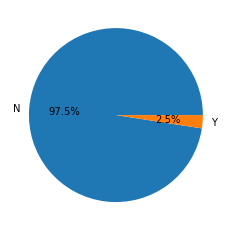

In [30]:
plt.pie(neo_data, labels = lables, autopct='%1.1f%%')
plt.show

**Of the near earth objects, what percent of them are potentially hazardous asteroids?**



In [31]:
neo_and_pha = asteroid_df[asteroid_df['neo']=='Y']['pha'].value_counts(normalize=True)*100
neo_and_pha


N    90.971464
Y     9.028536
Name: pha, dtype: float64

In [32]:
lables = 'N', 'Y'

<function matplotlib.pyplot.show(close=None, block=None)>

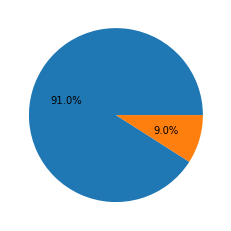

In [33]:
plt.pie(neo_and_pha, autopct='%1.1f%%')
plt.show

**How many asteroids of the dataset are potentially hazardous asteroids?**


In [34]:
asteroid_df['pha'].value_counts()

N    930269
Y      2066
Name: pha, dtype: int64

In [41]:
!pip install jovian --upgrade --quiet

In [43]:
import jovian

In [45]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.
